In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from datetime import datetime,timedelta
from dateutil.parser import parse

### 1、背景信息

### 2、数据理解

####  2.1、读取数据

In [5]:
df1 = pd.read_csv('InsuranceData.csv',encoding='gbk')
df1

,C_ID,Pur_int,gender,age,degree,YNkid,kid_num,kid0002,kid0305,kid0610,...,PMH,PDP,PMP,PHO,PSFH,PKF,reside_year,PPMP,FIZLR,meda
0,281478,0,M,67.0,5,Y,5,4,0,5,...,0,14,52,65,71.0,22,15.0,42,8,64.0
1,290485,0,M,76.0,4,U,0,0,0,0,...,0,15,44,81,99.0,37,17.0,46,3,61.0
2,299949,0,F,67.0,4,U,0,0,0,0,...,0,17,38,44,62.0,44,20.0,46,3,61.0
3,314635,0,F,71.0,4,Y,1,0,4,0,...,0,14,45,71,99.0,39,4.0,37,9,62.0
4,363702,0,F,75.0,4,U,0,0,0,0,...,10,29,32,13,36.0,15,9.0,37,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43661,408977775,1,F,65.0,4,Y,2,4,0,0,...,0,13,63,87,97.0,42,3.0,75,6,37.0
43662,408977955,1,F,70.0,4,U,0,0,0,0,...,0,18,28,86,95.0,33,1.0,40,6,49.0
43663,408978092,1,M,65.0,6,U,0,0,0,0,...,0,5,22,65,79.0,31,25.0,46,8,61.0
43664,408978770,1,M,75.0,4,U,0,0,0,0,...,0,17,45,42,40.0,23,17.0,83,5,31.0


#### 2.2 观察数据

In [6]:
df1.shape

(43666, 76)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   C_ID             43666 non-null  int64  
 1   Pur_int          43666 non-null  int64  
 2   gender           43666 non-null  object 
 3   age              43662 non-null  float64
 4   degree           43666 non-null  int64  
 5   YNkid            43666 non-null  object 
 6   kid_num          43666 non-null  int64  
 7   kid0002          43666 non-null  int64  
 8   kid0305          43666 non-null  int64  
 9   kid0610          43666 non-null  int64  
 10  kid1115          43666 non-null  int64  
 11  kid1618          43666 non-null  int64  
 12  adult_num        43666 non-null  int64  
 13  fam_mem_num      43666 non-null  int64  
 14  FYNU18           43666 non-null  object 
 15  FYN1819          43657 non-null  object 
 16  FYN2029          43666 non-null  object 
 17  FYN3039     

In [10]:
# df1.Pur_int.unique()
df1.Pur_int.value_counts()

0    26177
1    17489
Name: Pur_int, dtype: int64

In [12]:
# 描述统计
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
C_ID,43666.0,1.789466e+08,9.822350e+07,281478.0,108906510.5,181964294.5,220731848.0,408979600.0
Pur_int,43666.0,4.005176e-01,4.900089e-01,0.0,0.0,0.0,1.0,1.0
age,43662.0,7.122555e+01,4.318244e+00,65.0,67.0,71.0,75.0,101.0
degree,43666.0,4.142857e+00,1.071313e+00,0.0,3.0,4.0,5.0,8.0
kid_num,43666.0,4.657170e-01,1.045087e+00,0.0,0.0,0.0,0.0,9.0
kid0002,43666.0,2.678056e-01,9.964586e-01,0.0,0.0,0.0,0.0,6.0
kid0305,43666.0,2.140338e-01,8.869144e-01,0.0,0.0,0.0,0.0,7.0
kid0610,43666.0,3.819677e-01,1.178281e+00,0.0,0.0,0.0,0.0,7.0
kid1115,43666.0,3.131956e-01,1.047293e+00,0.0,0.0,0.0,0.0,7.0
kid1618,43666.0,2.243164e-01,8.582031e-01,0.0,0.0,0.0,0.0,7.0


### 3、可视化分析

In [13]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
# 解决中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # mac 用这行
# 负号正常显示
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size':12})        # 设置字号大小

import random
def getColor(n=None):
    if n:
        return ['#'+''.join(random.choices('0123456789abcdef',k=6)) for i in range(n)]
    else:
        return '#'+''.join(random.choices('0123456789abcdef',k=6))

#### 3.1、对是否购买的 目标变量 进行 处理

In [14]:
# 值统计
Purchase_freq = df1.Pur_int.value_counts()
Purchase_freq

0    26177
1    17489
Name: Pur_int, dtype: int64

In [17]:
# 根据是否购买， 分为 购买用户 与 未购买用户
df_Pur01 = df1[ df1.Pur_int ==1 ].reset_index()
df_Pur00 = df1[ df1.Pur_int ==0 ].reset_index()

- 对是否购买做可视化展示

<AxesSubplot:title={'center':'购买意愿饼图'}, ylabel='Pur_int'>

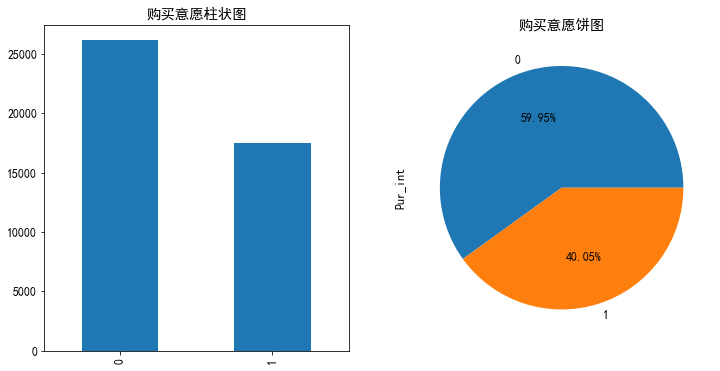

In [23]:
fig,axes = plt.subplots( 1,2 ,figsize=(12,6) )

Purchase_freq.plot.bar( ax = axes[0] ,title='购买意愿柱状图')

Purchase_freq.plot.pie( ax = axes[1] ,title='购买意愿饼图' ,autopct='%.2f%%')

#### 3.2 探索性分析 - 用户个人情况 与 是否购买 的关系

#####  1 、用户年龄 与 是否购买

（1） age分布直方图

In [43]:
df1.age.value_counts().sort_index()

65.0     3475
66.0     3967
67.0     3670
68.0     3423
69.0     3449
70.0     2948
71.0     2943
72.0     2909
73.0     2814
74.0     2817
75.0     2448
76.0     2220
77.0     2012
78.0     2038
79.0     1823
80.0      691
82.0        1
86.0        2
87.0        1
88.0        2
90.0        1
91.0        2
94.0        1
95.0        1
96.0        1
98.0        1
99.0        1
101.0       1
Name: age, dtype: int64

<AxesSubplot:>

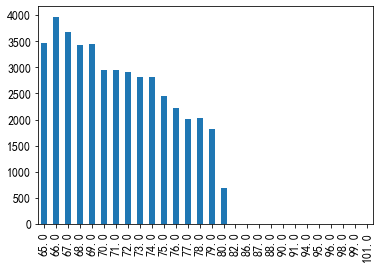

In [42]:
df1.age.value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

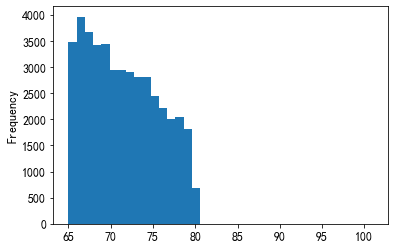

In [35]:
# 直方图 , 分为多少份  102-65
df1.age.plot.hist(bins= 37 )

    结论： 大部分购买用户在 65-80之间，而 65-69 是一个更多的购买数

##### (2)、用户 是否购买 的 平均年龄

In [45]:
df1.pivot_table(values='age' , index='Pur_int')

,age
Pur_int,
0,71.456998
1,70.879181


#####  (3)  查看 购买客户的 年龄分布情况

In [47]:
df_Pur01.age.value_counts()

66.0     1873
67.0     1589
65.0     1537
68.0     1473
69.0     1424
70.0     1243
71.0     1093
72.0     1081
74.0     1024
73.0     1020
75.0      897
76.0      820
78.0      764
77.0      743
79.0      652
80.0      244
86.0        2
88.0        2
91.0        2
98.0        1
82.0        1
101.0       1
96.0        1
87.0        1
99.0        1
Name: age, dtype: int64

#### 2、 性别 gender 与 是否购买的 关系

##### (1) 客户性别

In [49]:
df1.gender.value_counts()

F    25405
M    18261
Name: gender, dtype: int64

##### (2) 分组统计展示 是否 购买的 性别比列

In [60]:
df1.groupby(by=['Pur_int','gender'])['gender'].count().unstack()

gender,F,M
Pur_int,,
0,15117,11060
1,10288,7201


In [68]:
df1.pivot_table( values='age', index='Pur_int' , columns='gender' ,aggfunc='count' ,margins=True ,dropna=True)

gender,F,M,All
Pur_int,,,
0,15115,11058,26173
1,10288,7201,17489
All,25403,18259,43662


In [65]:
# 交叉表
pd.crosstab( df1.Pur_int ,df1.gender ,margins=True)

gender,F,M,All
Pur_int,,,
0,15117,11060,26177
1,10288,7201,17489
All,25405,18261,43666


- 探索女性别男性 购买人数多的其他原因

- a.性别

In [73]:
df_Pur01.groupby('gender').agg({'age':'mean'})

,age
gender,
F,71.114891
M,70.542425


- b. 教育程度

In [77]:
df_Pur01.YNcollege.value_counts()

N    15556
Y     1933
Name: YNcollege, dtype: int64

In [81]:
df_Pur01.groupby( ['gender','YNcollege'] )['YNcollege'].count()

gender  YNcollege
F       N            9071
        Y            1217
M       N            6485
        Y             716
Name: YNcollege, dtype: int64

In [82]:
1217/(9071+1217)

0.11829315707620529

In [83]:
716/(716+6485)

0.0994306346340786

- c.是否买过保险

In [84]:
df_Pur01.groupby( ['gender','YNI'] )['gender'].count()

gender  YNI
F       N      8253
        Y      2035
M       N      5852
        Y      1349
Name: gender, dtype: int64

In [88]:
get_pct = lambda x: x.loc[:,'Y']/x.sum(level=0) 
get_pct(df_Pur01.groupby( ['gender','YNI'] )['gender'].count())

gender
F    0.197803
M    0.187335
Name: gender, dtype: float64

- d.是否有过投资

In [89]:
get_pct(df_Pur01.groupby( ['gender','YNinvest'] )['gender'].count())

gender
F    0.249611
M    0.229968
Name: gender, dtype: float64

#### 3、学历degree 与 是否购买的关系

（1）值统计

In [91]:
df1.degree.value_counts()

4    18597
3    12437
6     7493
5     4474
2      462
7      130
0       60
1        9
8        4
Name: degree, dtype: int64

In [95]:
degree_dict = {
    0:np.nan,
    1:'初中',
    2:'高中未毕业',
    3:'高中',
    4:'大学未毕业',
    5:'大专',
    6:'本科',
    7:'研究生',
    8:'专科',
    9:'博士'
}
degree_dict

{0: nan,
 1: '初中',
 2: '高中未毕业',
 3: '高中',
 4: '大学未毕业',
 5: '大专',
 6: '本科',
 7: '研究生',
 8: '专科',
 9: '博士'}

<AxesSubplot:>

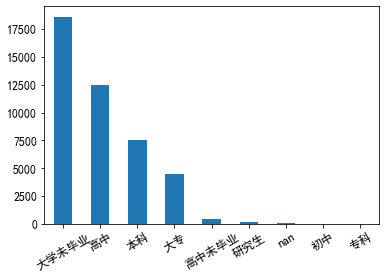

In [98]:
df1.degree.value_counts().rename(index=degree_dict).plot.bar(rot=30)

- 疾病史 与 是否 购买

In [101]:
df1.columns

Index(['C_ID', 'Pur_int', 'gender', 'age', 'degree', 'YNkid', 'kid_num',
       'kid0002', 'kid0305', 'kid0610', 'kid1115', 'kid1618', 'adult_num',
       'fam_mem_num', 'FYNU18', 'FYN1819', 'FYN2029', 'FYN3039', 'FYN4049',
       'FYN5059', 'FYN6064', 'FYN65P', 'YNelder', 'AART', 'ADBT', 'ADEP',
       'AHBP', 'AHCH', 'ARES', 'AHRT', 'AASN', 'ADGS', 'AHRL', 'ASKN', 'AVIS',
       'YNBR', 'YNcollege', 'YNI', 'YNLI', 'YNMI', 'YNinvest', 'YNOS', 'YNEP',
       'city_size', 'YNONL', 'YNLA', 'YNLS', 'YNOE', 'YNLE', 'YNST',
       'happiness_index', 'YNHouse', 'YNHIS', 'income_rank', 'FEPI',
       'family_income', 'house_value', 'SESS', 'family_time', 'LS_num',
       'State_Name', 'PAP', 'PBP', 'CA2000', 'PBC', 'PWC', 'PMH', 'PDP', 'PMP',
       'PHO', 'PSFH', 'PKF', 'reside_year', 'PPMP', 'FIZLR', 'meda'],
      dtype='object')

In [111]:
df_disease = df1[df1.columns[23:35]]
YNdis = df_disease.apply(pd.value_counts ,axis=1)

In [115]:
YNdis = YNdis.fillna(0).rename(columns={'N':'Ndis','Y':'Ydis'})

In [118]:
df2 = pd.concat( [df1,YNdis]  ,axis=1)

In [120]:
df2.head()

,C_ID,Pur_int,gender,age,degree,YNkid,kid_num,kid0002,kid0305,kid0610,...,PMP,PHO,PSFH,PKF,reside_year,PPMP,FIZLR,meda,Ndis,Ydis
0,281478,0,M,67.0,5,Y,5,4,0,5,...,52,65,71.0,22,15.0,42,8,64.0,12.0,0.0
1,290485,0,M,76.0,4,U,0,0,0,0,...,44,81,99.0,37,17.0,46,3,61.0,12.0,0.0
2,299949,0,F,67.0,4,U,0,0,0,0,...,38,44,62.0,44,20.0,46,3,61.0,12.0,0.0
3,314635,0,F,71.0,4,Y,1,0,4,0,...,45,71,99.0,39,4.0,37,9,62.0,12.0,0.0
4,363702,0,F,75.0,4,U,0,0,0,0,...,32,13,36.0,15,9.0,37,3,NaN,12.0,0.0


In [126]:
pd.crosstab( df2.Pur_int ,df2.Ydis )

Ydis,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Pur_int,,,,,,,,,,,,,
0,21133,399,421,590,684,765,716,582,410,269,117,68,23
1,13089,307,383,466,587,614,587,502,397,277,154,83,43


In [131]:
df2.groupby(['Pur_int','Ydis']).count()['age'].unstack()

Ydis,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Pur_int,,,,,,,,,,,,,
0,21129,399,421,590,684,765,716,582,410,269,117,68,23
1,13089,307,383,466,587,614,587,502,397,277,154,83,43


In [136]:
pd.crosstab( df2.Pur_int ,df2.Ydis ).apply(lambda x:x/x.sum() ,axis=0 )

Ydis,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Pur_int,,,,,,,,,,,,,
0,0.617527,0.565156,0.523632,0.558712,0.538159,0.55475,0.549501,0.5369,0.508055,0.492674,0.431734,0.450331,0.348485
1,0.382473,0.434844,0.476368,0.441288,0.461841,0.44525,0.450499,0.4631,0.491945,0.507326,0.568266,0.549669,0.651515


<AxesSubplot:xlabel='Ydis'>

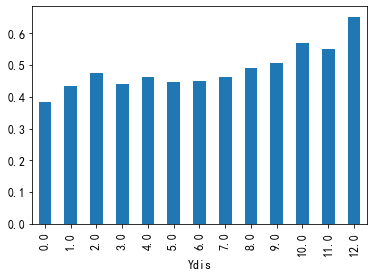

In [139]:
pd.crosstab( df2.Pur_int ,df2.Ydis ).apply(lambda x:x/x.sum() ,axis=0 ).iloc[1].plot.bar()